In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as plt_pdf
import os


colors = sns.color_palette("tab10").as_hex()
colors = ["#402040"] + colors
palette = {
    "noir": colors[0],
    "noir-shared": colors[0],
    "noir-ad-hoc": colors[0],
    "omp": colors[4],
    "mpi": colors[4],
    "mpi-mmap": colors[4],
    "mpi-opemp": colors[4],
    "rayon": colors[3],
    "flink": colors[2],
    "timely": colors[5],
    "ideal": colors[8],
    "linear": colors[8],
}
dash_list = [
    (0, (1, 10)),
    (0, (1, 1)),
    (0, (1, 1)),
    (5, (10, 3)),
    (0, (5, 10)),
    (0, (5, 5)),
    (0, (5, 1)),
]
lines = {
    "noir": dash_list[0],
    "noir-shared": dash_list[0],
    "noir-ad-hoc": dash_list[0],
    "omp": dash_list[1],
    "mpi": dash_list[1],
    "mpi-mmap": dash_list[1],
    "mpi-opemp": dash_list[1],
    "flink": dash_list[2],
    "timely": dash_list[3],
    "rayon": dash_list[4],
    "ideal": dash_list[5],
    "linear": dash_list[5],
}
hue_kws = {'color': palette, "ls" : lines}

linestyles = ["-", "--", ":", "-."]
sns.set_theme(context='paper', style='whitegrid', palette="tab10", font='Times New Roman', font_scale=2.6125)

In [2]:
df = pd.read_csv("../../results/csv/single.csv", dtype={"system": "string", "bench": "string", "version":"string"})

df["experiment"] = df["bench"] + "-" + df["version"]

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   system      212 non-null    string 
 1   bench       212 non-null    string 
 2   version     212 non-null    string 
 3   cpu         212 non-null    int64  
 4   time        212 non-null    float64
 5   experiment  212 non-null    string 
dtypes: float64(1), int64(1), string(4)
memory usage: 10.1 KB
None


In [3]:
def _time_plot(data, experiments, systems):
    if systems is not None:
        data = data[data["system"].isin(systems)]
    if experiments is not None:
        data = data[data["experiment"].isin(experiments)]

    # sns.pointplot(data=data, x="cpu", y="time", hue="system", style="system", capsize = 0.2, errorbar=("ci", 90), errcolor='grey', palette=palette, linestyles=linestyles)
    g = sns.relplot(data=data, x="cpu", y="time", hue="system", style="system", col="experiment", kind="line",
                    err_style="band", errorbar=("ci", 90), linewidth=3, palette=palette, aspect=1.125,  facet_kws={"legend_out": False, "despine": False})
    g.set_titles(template="")
    g.set_axis_labels(x_var="cpu cores", y_var="execution time[s]")
    plt.tight_layout()
    leg = plt.legend(frameon=False, labelspacing=0.1)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    plt.xticks([x for x in [8, 16, 32, 64]])

def time_plot(data, experiments, systems=None):
    _time_plot(data, experiments, systems)
    plt.ylim(0, None)

def time_plot_log(data, experiments, systems=None):
    _time_plot(data, experiments, systems)
    plt.semilogy()

In [4]:
def save_plot(exp, basepath = "./plots"):
    path = f"{basepath}/verical-{'-'.join(exp)}"
    if not os.path.exists(path):
        os.makedirs(path)
    plt.savefig(f"{path}/time.pdf", bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


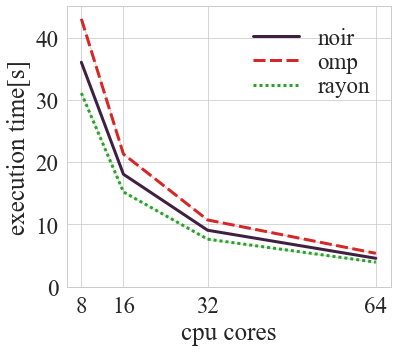

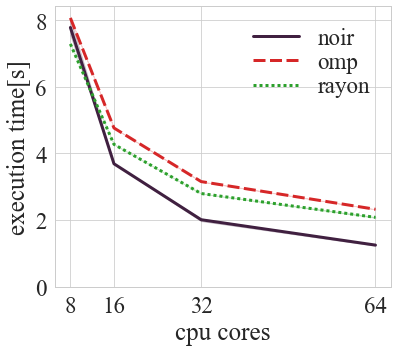

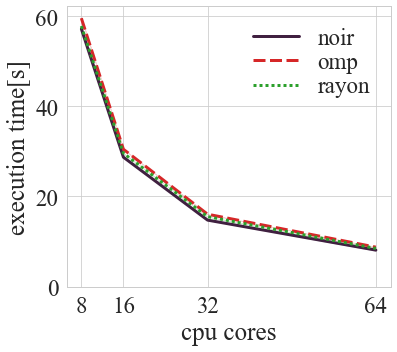

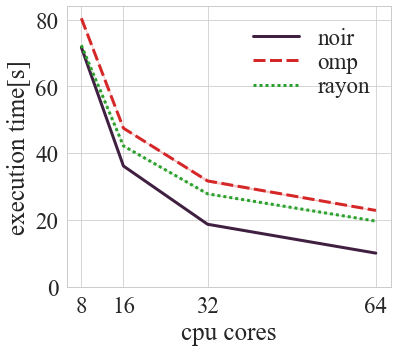

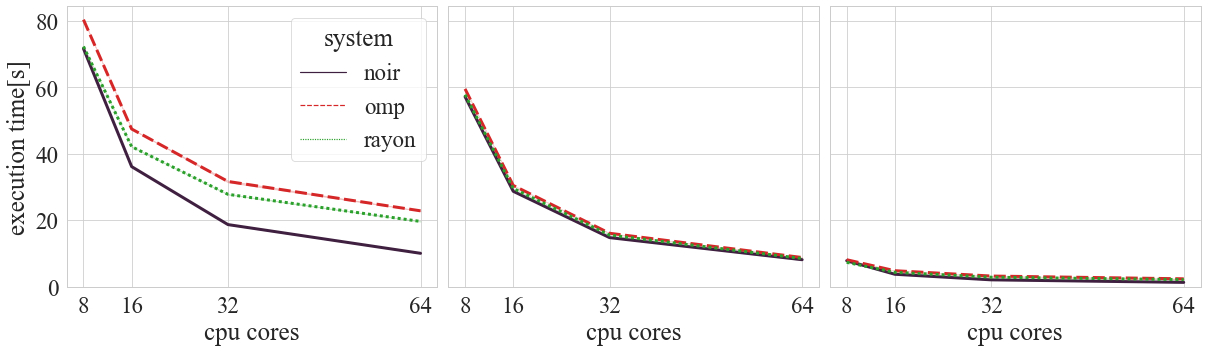

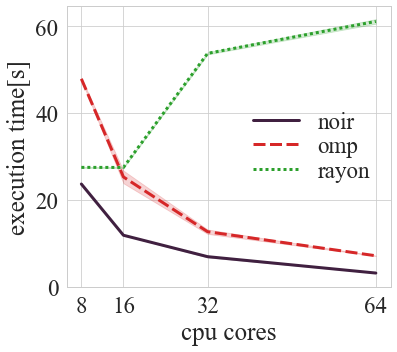

In [5]:
experiments = [
    ["collatz-default"],
    ["kmeans-200m30c"],
    ["kmeans-200m300c"],
    ["kmeans-2000m30c"],
    ["kmeans-200m30c", "kmeans-200m300c", "kmeans-2000m30c",],
    ["wordcount-default"],
]

for experiment in experiments:
    time_plot(df, experiment)
    save_plot(experiment)
